In [31]:
!pip install langgraph

In [32]:
from typing import TypedDict
from langgraph.graph import StateGraph, START , END

In [33]:
class AgentState(TypedDict):
  number_one: int
  number_two: int
  result: str
  operation: str

In [34]:
def adder(state: AgentState) -> AgentState:
  """This node adds two numbers"""
  state['result'] = state['number_one'] + state['number_two']

  return state


def subtractor(state: AgentState) -> AgentState:
  """This node subtracts two numbers"""
  state['result'] = state['number_one'] - state['number_two']

  return state


def decide_next_operation(state: AgentState) -> str:
  """This node decides which operation to perform next"""

  if state['operation'] == 'add':
    return 'add'
  else:
    return 'subtract'



In [35]:
graph= StateGraph(AgentState)

graph.add_node('adder', adder)
graph.add_node('subtractor', subtractor)

graph.add_node('router', lambda state:state) # pass to function

graph.add_edge(START, 'router')
graph.add_conditional_edges(
    'router',
    decide_next_operation,
    {
        'add': 'adder',
        'subtract': 'subtractor'
    }
)

graph.add_edge('adder', END)
graph.add_edge('subtractor', END)



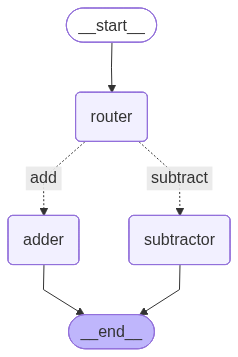

In [36]:
bot=graph.compile()

bot

In [37]:
input_state = {
  'number_one': 10,
  'number_two': 5,
  'operation': 'add',
  'result': None
}

response=bot.invoke(input_state)

print(response)


{'number_one': 10, 'number_two': 5, 'result': 15, 'operation': 'add'}


In [39]:
input_state = {
    'number_one': 10,
    'number_two': 5,
    'operation': 'subtract',
    'result': None
}

response=bot.invoke(input_state)

print(response)

{'number_one': 10, 'number_two': 5, 'result': 5, 'operation': 'subtract'}
